In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [4]:
# in millions of units sold
df = pd.read_csv('total_vehicle_sales.csv')

In [286]:
df.head()

,total_sales
DATE,
1976-01-01,12.814
1976-02-01,13.340
1976-03-01,13.378
1976-04-01,13.223
1976-05-01,12.962


In [7]:
from tabula import read_pdf

In [35]:
df2 = read_pdf("copper_summary_2022.pdf", pages='2')[0]
# convert PDF into CSV
df2.to_csv('copper_summary_2022.csv', encoding='utf-8')
print(df2)

   company and (or) Government information.           Unnamed: 0 Unnamed: 1
0                           Mine production  Refinery production  Reserves6
1                                2020 2021e           2020 2021e        NaN
2                 United States 1,200 1,200            918 1,000     48,000
3                         Australia 885 900              427 450    793,000
4                            Canada 585 590             e290 300      9,800
5                         Chile 5,730 5,600          2,330 2,200    200,000
6                         China 1,720 1,800        10,000 10,000     26,000
7              Congo (Kinshasa) 1,600 1,800          1,350 1,500     31,000
8                               Germany — —              643 630          —
9                         Indonesia 505 810              269 270     24,000
10                                Japan — —          1,580 1,500          —
11                       Kazakhstan 552 520              515 470     20,000
12          

In [36]:
df2

,company and (or) Government information.,Unnamed: 0,Unnamed: 1
0,Mine production,Refinery production,Reserves6
1,2020 2021e,2020 2021e,NaN
2,"United States 1,200 1,200","918 1,000","48,000"
3,Australia 885 900,427 450,"793,000"
4,Canada 585 590,e290 300,"9,800"
5,"Chile 5,730 5,600","2,330 2,200","200,000"
6,"China 1,720 1,800","10,000 10,000","26,000"
7,"Congo (Kinshasa) 1,600 1,800","1,350 1,500","31,000"
8,Germany — —,643 630,—
9,Indonesia 505 810,269 270,"24,000"


In [37]:
df3 = read_pdf("icsg_factbook_2021.pdf", pages='65')[0]
# convert PDF into CSV
#df3.to_csv('copper_summary_2022.csv', encoding='utf-8')

In [38]:
df3

,Unnamed: 0,Mine,Refined,Refined.1,Unnamed: 1,Mine.1,Refined.2,Refined.3,Unnamed: 2,Mine.2,Refined.4,Refined.5
0,NaN,Production,Production,Usage,NaN,Production,Production,Usage,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738",1980.0,"7,227","9,261","9,396",2000,"13,199","14,793","15,122"
2,1961.0,"4,081","5,127","5,050",1981.0,"7,721","9,573","9,522",2001,"13,636","15,638","14,938"
3,1962.0,"4,216","5,296","5,048",1982.0,"7,745","9,319","9,090",2002,"13,487","15,354","15,133"
4,1963.0,"4,286","5,400","5,500",1983.0,"7,824","9,541","9,510",2003,"13,699","15,272","15,641"
5,1964.0,"4,443","5,739","5,995",1984.0,"8,135","9,440","9,930",2004,"14,594","15,918","16,743"
6,1965.0,"4,769","6,059","6,193",1985.0,"8,314","9,616","9,798",2005,"14,927","16,572","16,552"
7,1966.0,"4,987","6,324","6,445",1986.0,"8,295","9,920","10,112",2006,"14,983","17,288","16,917"
8,1967.0,"4,743","6,004","6,195",1987.0,"8,620","10,148","10,293",2007,"15,508","17,895","18,026"
9,1968.0,"5,010","6,653","6,523",1988.0,"8,773","10,512","10,668",2008,"15,532","18,191","17,877"


In [56]:
df3_1 = df3[['Unnamed: 0', 'Mine', 'Refined', 'Refined.1']]

In [67]:
df3_1.head(2)

,Unnamed: 0,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738"


In [57]:
df3_2 = df3[['Unnamed: 1', 'Mine.1', 'Refined.2', 'Refined.3']]

df3_3 = df3[['Unnamed: 2', 'Mine.2', 'Refined.4', 'Refined.5']]

In [64]:
df3_2.head(2)

,Unnamed: 1,Mine.1,Refined.2,Refined.3
0,NaN,Production,Production,Usage
1,1980.0,"7,227","9,261","9,396"


In [65]:
df3_2.rename(columns = {'Unnamed: 1':'Unnamed: 0', 'Mine.1':'Mine', 'Refined.2':'Refined', 'Refined.3':'Refined.1'}, inplace = True)

/var/folders/m5/n8yy2hwx2ms0vhk6t4y8c_vr0000gn/T/ipykernel_86308/3213898340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_2.rename(columns = {'Unnamed: 1':'Unnamed: 0', 'Mine.1':'Mine', 'Refined.2':'Refined', 'Refined.3':'Refined.1'}, inplace = True)


In [66]:
df3_2.head(2)

,Unnamed: 0,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1980.0,"7,227","9,261","9,396"


In [68]:
df3_3.head(2)

,Unnamed: 2,Mine.2,Refined.4,Refined.5
0,NaN,Production,Production,Usage
1,2000,"13,199","14,793","15,122"


In [69]:
df3_3.rename(columns = {'Unnamed: 2':'Unnamed: 0', 'Mine.2':'Mine', 'Refined.4':'Refined', 'Refined.5':'Refined.1'}, inplace = True)

/var/folders/m5/n8yy2hwx2ms0vhk6t4y8c_vr0000gn/T/ipykernel_86308/3335793222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_3.rename(columns = {'Unnamed: 2':'Unnamed: 0', 'Mine.2':'Mine', 'Refined.4':'Refined', 'Refined.5':'Refined.1'}, inplace = True)


In [70]:
df3_3.head(2)

,Unnamed: 0,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,2000,"13,199","14,793","15,122"


In [73]:
copper = pd.concat([df3_1, df3_2, df3_3], axis=0)

In [76]:
copper.head(2)

,year,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738"


In [75]:
copper.rename(columns = {'Unnamed: 0':'year', 'Mine.1':'mine_production', 'Refined.2':'refined_production', 'Refined.3':'refined_usage'}, inplace = True)

In [79]:
copper

,year,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738"
2,1961.0,"4,081","5,127","5,050"
3,1962.0,"4,216","5,296","5,048"
4,1963.0,"4,286","5,400","5,500"
...,...,...,...,...
17,2016,"20,395","23,356","23,487"
18,2017,"20,067","23,557","23,705"
19,2018,"20,579","24,075","24,484"
20,2019,"20,571","24,028","24,429"


In [81]:
copper = copper.drop(0)

In [82]:
copper

,year,Mine,Refined,Refined.1
1,1960.0,"3,924","4,998","4,738"
2,1961.0,"4,081","5,127","5,050"
3,1962.0,"4,216","5,296","5,048"
4,1963.0,"4,286","5,400","5,500"
5,1964.0,"4,443","5,739","5,995"
...,...,...,...,...
17,2016,"20,395","23,356","23,487"
18,2017,"20,067","23,557","23,705"
19,2018,"20,579","24,075","24,484"
20,2019,"20,571","24,028","24,429"


In [83]:
copper.rename(columns = {'Unnamed: 0':'year', 'Mine':'mine_production', 'Refined':'refined_production', 'Refined.1':'refined_usage'}, inplace = True)

In [84]:
# in thousand metric tons
copper

,year,mine_production,refined_production,refined_usage
1,1960.0,"3,924","4,998","4,738"
2,1961.0,"4,081","5,127","5,050"
3,1962.0,"4,216","5,296","5,048"
4,1963.0,"4,286","5,400","5,500"
5,1964.0,"4,443","5,739","5,995"
...,...,...,...,...
17,2016,"20,395","23,356","23,487"
18,2017,"20,067","23,557","23,705"
19,2018,"20,579","24,075","24,484"
20,2019,"20,571","24,028","24,429"


In [167]:
copper.to_csv('copper_production.csv')

In [93]:
df.DATE = pd.to_datetime(df.DATE)

In [96]:
df.dtypes

DATE       datetime64[ns]
TOTALSA           float64
dtype: object

In [98]:
df = df.set_index('DATE').sort_index()

In [100]:
df.rename(columns = {'TOTALSA':'total_sales'}, inplace = True)

In [101]:
df

,total_sales
DATE,
1976-01-01,12.814
1976-02-01,13.340
1976-03-01,13.378
1976-04-01,13.223
1976-05-01,12.962
...,...
2022-04-01,14.956
2022-05-01,13.258
2022-06-01,13.491


<AxesSubplot:xlabel='DATE'>

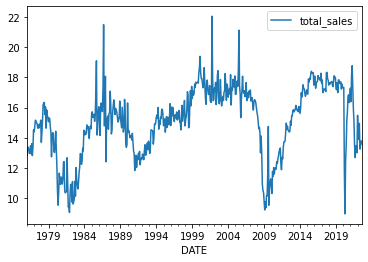

In [102]:
df.plot()

In [175]:
copper.head()

,mine_production,refined_production,refined_usage
year,,,
1960.0,3924,4998,4738
1961.0,4081,5127,5050
1962.0,4216,5296,5048
1963.0,4286,5400,5500
1964.0,4443,5739,5995


In [153]:
copper = copper.replace(',','', regex=True)

In [221]:
copper = copper.replace('/p','', regex=True)

In [142]:
copper.set_index('year', inplace=True)

In [128]:
copper.shape

(63, 4)

In [222]:
copper = copper.astype('int')

In [223]:
copper.dtypes

year                  int64
mine_production       int64
refined_production    int64
refined_usage         int64
dtype: object

In [218]:
copper = copper.reset_index()

<AxesSubplot:>

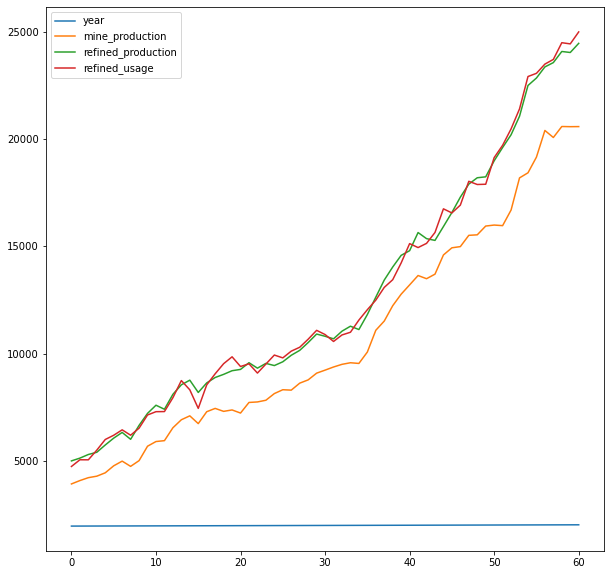

In [224]:
#plt.figure(figsize=(20, 9))
copper.plot(figsize=(10, 10))

In [135]:
copper = copper.dropna()

In [136]:
copper.shape

(61, 4)

In [121]:
copper[copper['year'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [124]:
copper[copper['mine_production'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [125]:
copper[copper['refined_production'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [126]:
copper[copper['refined_usage'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [114]:
copper.dtypes

year                  object
mine_production       object
refined_production    object
refined_usage         object
dtype: object

### BEA data: Car sales

In [295]:
bea = pd.read_csv('new_vehicle_by_sector.csv')

In [296]:
bea

,Business,AUTO35,"2,031.3","1,834.4","1,954.5","2,164.6","2,099.3","2,092.0","2,038.2","1,976.0",...,991.9,"1,004.7","1,055.9","1,039.3",982.8,"1,214.1","1,007.4","1,022.4","1,008.3",Unnamed: 669
0,Consumer,AUTO40,"6,362.1","5,632.8","5,932.2","6,671.7","6,569.4","6,804.8","6,637.1","6,058.1",...,"1,677.7","1,641.6","1,950.3","1,816.0","1,684.7","1,769.3","1,649.7","1,650.4","1,749.0",NaN
1,NaN,NaN,1967M01,1967M02,1967M03,1967M04,1967M05,1967M06,1967M07,1967M08,...,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04,2022M05,2022M06,2022M07,NaN


# Pre-Model
## Split: Total Vehicle Sales

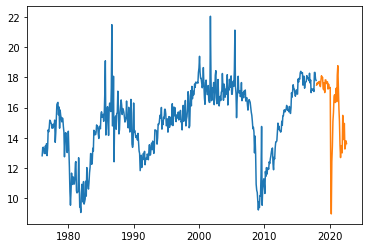

In [108]:
train_size = .90
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

plt.plot(train)
plt.plot(test)

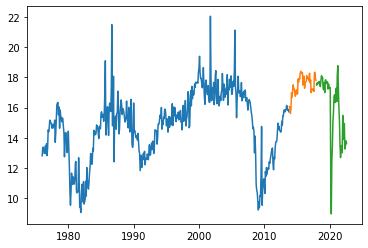

In [110]:
train_size = .90
n = train.shape[0]
validate_start_index = round(train_size * n)

train = df[:validate_start_index]
validate = df[validate_start_index:test_start_index]

plt.plot(train)
plt.plot(validate)
plt.plot(test)

In [169]:
cp = pd.read_csv('copper.csv')

In [171]:
cp = cp.replace('\(','', regex=True)

In [172]:
cp = cp.replace('\)', '', regex=True)

In [173]:
cp

,Unnamed: 0,year,prod_mine,refine_from_ore,refine_new_scrap,refine_old_scrap,import_ore,import_refined,export_ore,export_refined,consumption_refined,consumption_refined_plus_scrap
0,0,1995-01-01,"1,260","1,040",40,146,14,813,237,94,"1,800","1,860"
1,1,1996-01-01,"1,220","1,070",41,149,32,778,253,190,"1,820","1,830"
2,2,1997-01-01,"1,260",985,44,e150,27,663,353,125,"1,830","1,810"
3,3,1998-01-01,"1,200",874,43,e150,2,676,383,41,"1,710","1,650"
4,4,1999-01-01,"1,200",950,50,160,13,920,360,50,"1,800","2,000"
5,5,2001-01-01,"1,170",962,39,164,6,630,301,169,"1,760","1,760"
6,6,2002-01-01,"1,250",993,47,166,3,734,348,111,"1,830","1,750"
7,7,2003-01-01,"1,360","1,050",46,173,2,620,410,127,"1,760","1,780"
8,8,2004-01-01,"1,380","1,090",49,167,2,686,392,86,"1,810","1,820"
9,9,2005-01-01,"1,410","1,160",50,170,2,670,340,100,"1,790","1,800"


## Split: Global Copper Production

In [225]:
copper.head(1)

,year,mine_production,refined_production,refined_usage
0,1960,3924,4998,4738


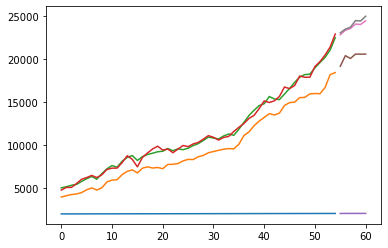

In [237]:
train_size = .90
n = copper.shape[0]
test_start_index = round(train_size * n)

train = copper[:test_start_index]
test = copper[test_start_index:]

plt.plot(train)
plt.plot(test)

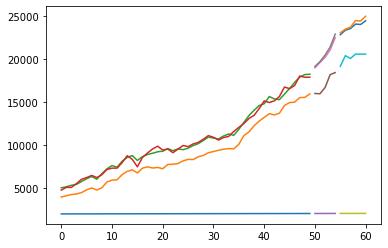

In [238]:
train_size = .90
n = train.shape[0]
validate_start_index = round(train_size * n)

train = copper[:validate_start_index]
validate = copper[validate_start_index:test_start_index]

plt.plot(train)
plt.plot(validate)
plt.plot(test)

## Baseline: Moving Average

In [249]:
# evaluate will return the RMSE for the particular model and target variable
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

# plot_and_eval will plot the data alongside the predictions and display the result in terms of RMSE
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
    
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'mine_production', 'rmse_1', 'refined_production', 'rmse_2'])

# append_eval_df which store the performance of each model on each target variable for ease of comparison
def append_eval_df(model_type, target_var, target_var_2):
    rmse_1 = evaluate(target_var)
    rmse_2 = evaluate(target_var_2)
    d = {'model_type': [model_type], 'mine_production': [target_var], 'rmse_1': [rmse_1], 'refined_production': [target_var_2], 'rmse_2': rmse_2}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [250]:
train.head(2)

,year,mine_production,refined_production,refined_usage
0,1960,3924,4998,4738
1,1961,4081,5127,5050


In [252]:
# assign period of 1, representing one year
period = 1

# assign values for moving avg
mine_prod = round(train['mine_production'].rolling(period).mean().iloc[-1], 2)
refined_prod = round(train['refined_production'].rolling(period).mean().iloc[-1], 2)

# create dataframe with these values
yhat_df = pd.DataFrame({'mine_production': [mine_prod],
                            'refined_production': [refined_prod],
                           }, index = validate.index)
yhat_df.head(2)

,mine_production,refined_production
50,15941.0,18234.0
51,15941.0,18234.0


mine_production -- RMSE: 1533


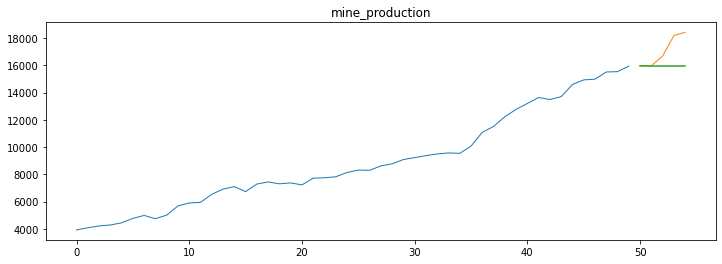

In [253]:
plot_and_eval('mine_production')

refined_production -- RMSE: 2544


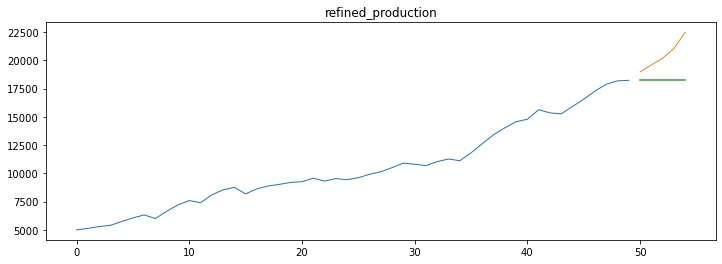

In [254]:
plot_and_eval('refined_production')

## Holt Linear Trend

In [256]:
from statsmodels.tsa.api import Holt

# learn and fit Holt algorithm to train data set
model = Holt(train['mine_production'], exponential = False)
model = model.fit(smoothing_level = .1,
                 smoothing_slope = .1,
                 optimized = False)

# make predictions
yhat_items = model.predict(start = validate.index[0],
                          end = validate.index[-1])

# create dataframe
yhat_df['mine_production'] = round(yhat_items, 2)

/var/folders/m5/n8yy2hwx2ms0vhk6t4y8c_vr0000gn/T/ipykernel_86308/3139781589.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = model.fit(smoothing_level = .1,


In [257]:
# learn and fit Holt algorithm to train data set
model = Holt(train['refined_production'], exponential = False)
model = model.fit(smoothing_level = .1,
                 smoothing_slope = .1,
                 optimized = False)

# make predictions
yhat_items = model.predict(start = validate.index[0],
                          end = validate.index[-1])

# create dataframe
yhat_df['refined_production'] = round(yhat_items, 2)

/var/folders/m5/n8yy2hwx2ms0vhk6t4y8c_vr0000gn/T/ipykernel_86308/3834468569.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = model.fit(smoothing_level = .1,


mine_production -- RMSE: 973


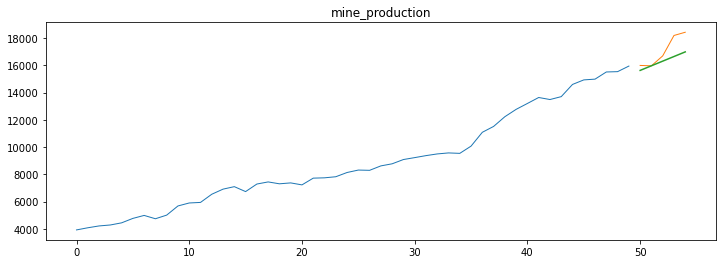

In [258]:
plot_and_eval('mine_production')

refined_production -- RMSE: 2184


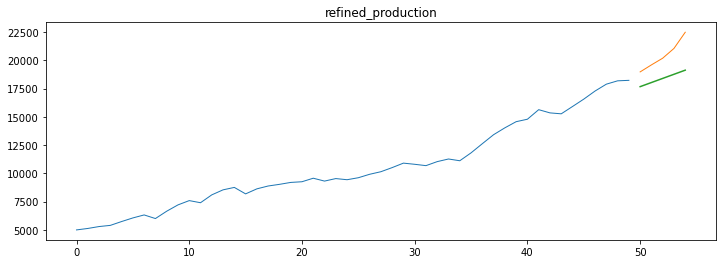

In [259]:
plot_and_eval('refined_production')

## ARIMA (attempt)

In [266]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train.mine_production)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.601996
p-value: 0.997864


"The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary."

### Null Hypothesis:
- Mine Production data is non-stationary. 

Fail to reject the null hypothesis. Must difference the data.

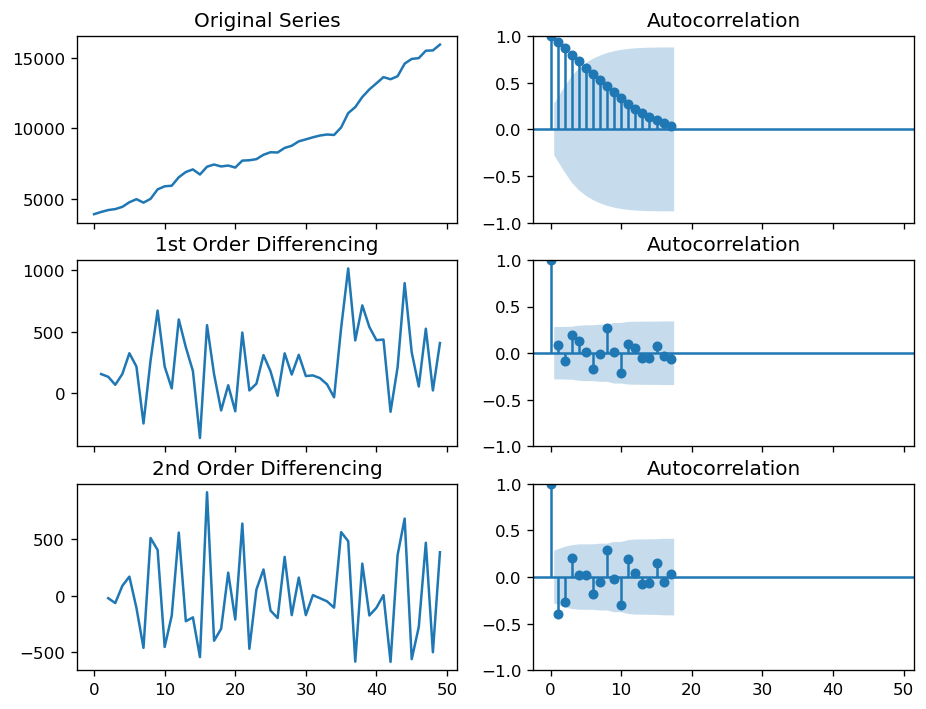

In [267]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train.mine_production); axes[0, 0].set_title('Original Series')
plot_acf(train.mine_production, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train.mine_production.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train.mine_production.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train.mine_production.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train.mine_production.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

The 2nd order of differencing looks very stationary but the autocorrelation may be going too negative too quickly. 1st order looks stationary enough and may be what I end up moving forward with.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


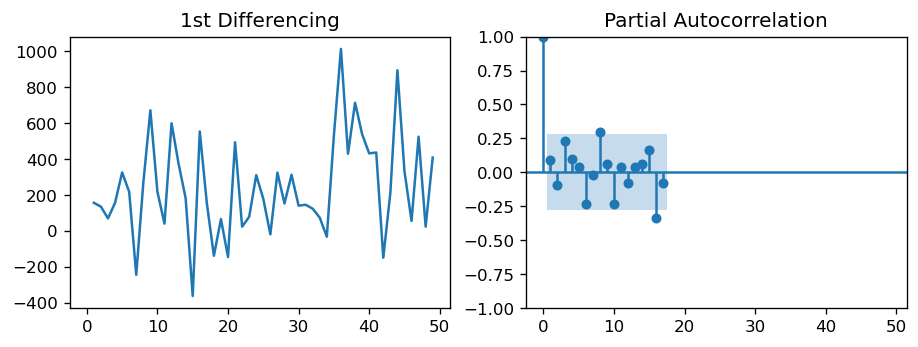

In [268]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.mine_production.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(train.mine_production.diff().dropna(), ax=axes[1])

plt.show()

PACF lag 1 is significant.

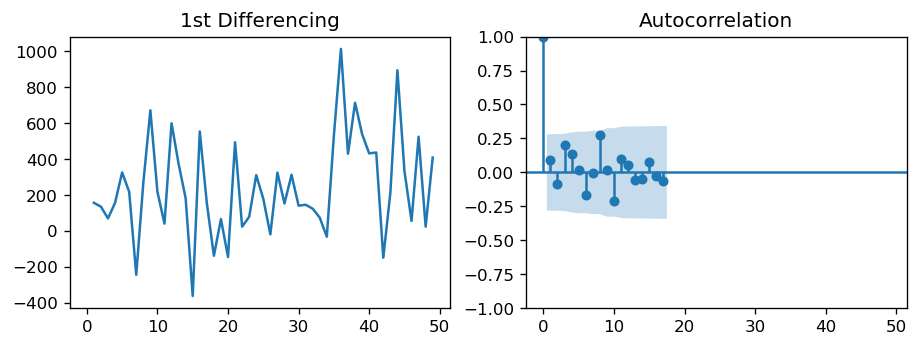

In [269]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.mine_production.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train.mine_production.diff().dropna(), ax=axes[1])

plt.show()

Fix q as 1.

In [272]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(train.mine_production, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        mine_production   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -346.166
Date:                Fri, 16 Sep 2022   AIC                            698.332
Time:                        16:02:23   BIC                            704.007
Sample:                             0   HQIC                           700.485
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9936      0.022     46.074      0.000       0.951       1.036
ma.L1         -0.9110      0.099     -9.187      0.000      -1.105      -0.717
sigma2      7.823e+04   1.47e+04      5.317      0.0

Note how significant P>|z| is. "Very nice!"

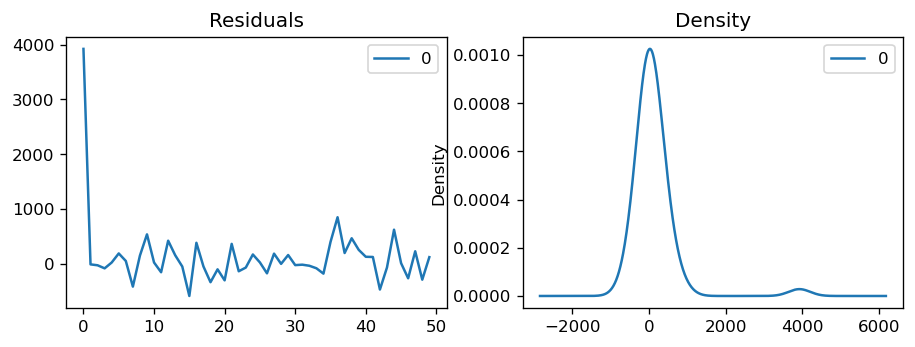

In [273]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Near-zero mean. 

<AxesSubplot:>

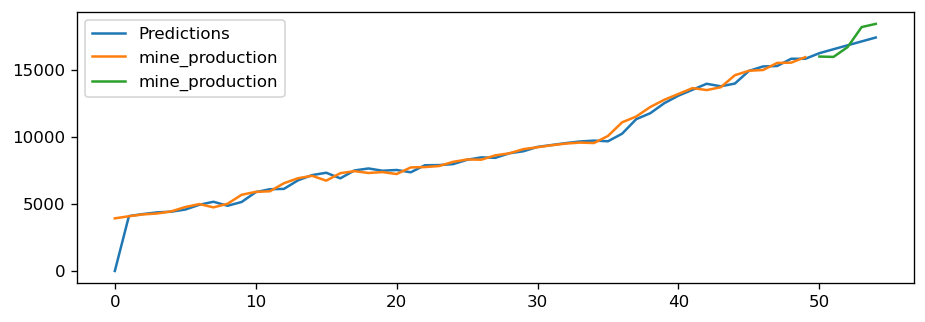

In [279]:
start = 0
end = len(train) + len(validate) - 1
  
# Predictions for one-year against the train set
predictions = model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['mine_production'].plot(legend = True)
validate['mine_production'].plot(legend = True)

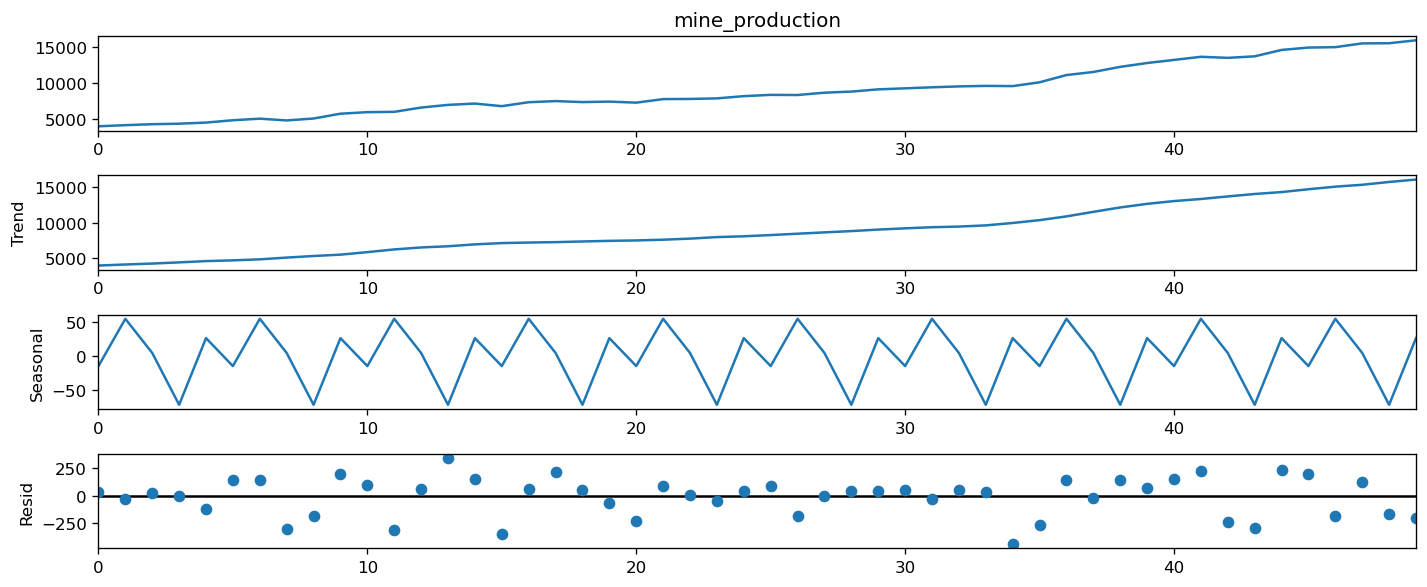

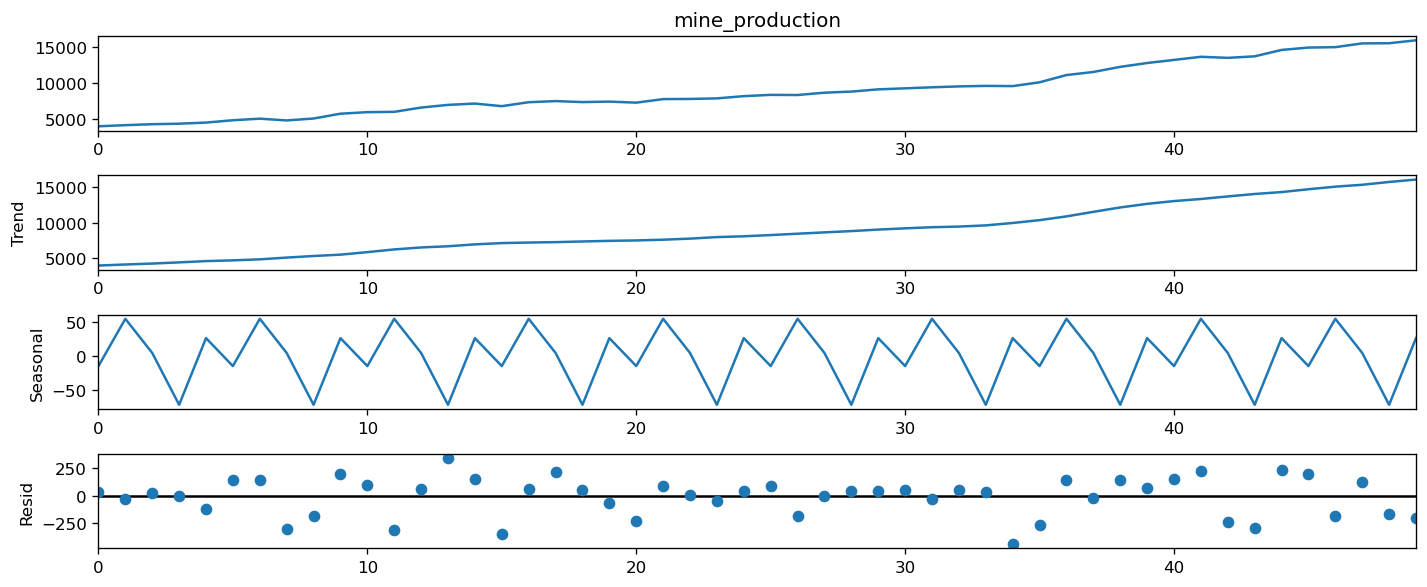

In [301]:
# testing for seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train.mine_production, model='ad', extrapolate_trend='freq', period = 5)

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot()

There does appear to be seasonality in this data, so I will need to introduce a model which works with seasonal data. Probably SARIMAX. 

## SARIMA

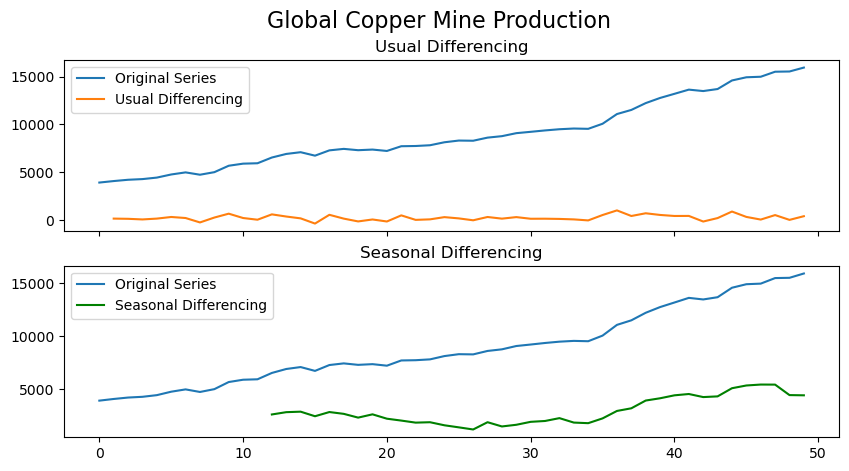

In [299]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(train.mine_production[:], label='Original Series')
axes[0].plot(train.mine_production[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(train.mine_production[:], label='Original Series')
axes[1].plot(train.mine_production[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Global Copper Mine Production', fontsize=16)
plt.show()

In [305]:

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train.mine_production, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=532.655, Time=0.69 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=553.682, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=541.258, Time=0.36 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=530.665, Time=0.51 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=535.878, Time=0.04 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=532.610, Time=0.66 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=532.583, Time=0.88 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=531.660, Time=0.39 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=548.537, Time=0.22 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=532.652, Time=0.88 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=540.555, Time=0.24 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.66 sec

Best model:  ARIMA(0,2,1)(0,1,1)[12]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   50
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -262.332
Date:                            Mon, 19 Sep 2022   AIC                            530.665
Time:                                    11:54:22   BIC                            535.415
Sample:                                         0   HQIC                           532.323
                                             - 50                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8663      0.132     -6.549      0.000      -1.126      -0.607
ma.S.L12      -0.6683      0.713     -0.938      0.348      -2.065       0.729
sigma2      1.014e+05   6.05e+04      1.676      0.094   -1.72e+04     2.2e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.73   Prob(JB):                         0.82
Heteroskedasticity (H):               2.78   Skew:                            -0.21
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [306]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train.refined_production, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=543.914, Time=0.64 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=558.758, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=549.400, Time=0.31 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=542.005, Time=0.59 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=547.006, Time=0.04 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=544.875, Time=0.20 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=556.632, Time=0.16 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=543.939, Time=0.55 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=546.498, Time=0.23 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.56 sec

Best model:  ARIMA(0,2,1)(0,1,1)[12]          
Total

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   50
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -268.003
Date:                            Mon, 19 Sep 2022   AIC                            542.005
Time:                                    11:55:50   BIC                            546.756
Sample:                                         0   HQIC                           543.663
                                             - 50                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8498      0.119     -7.148      0.000      -1.083      -0.617
ma.S.L12      -0.7688      0.567     -1.357      0.175      -1.880       0.342
sigma2      1.256e+05   7.06e+04      1.779      0.075   -1.28e+04    2.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.76   Prob(JB):                         0.44
Heteroskedasticity (H):               1.09   Skew:                            -0.35
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [304]:
pip install pmdarima

     |████████████████████████████████| 577 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


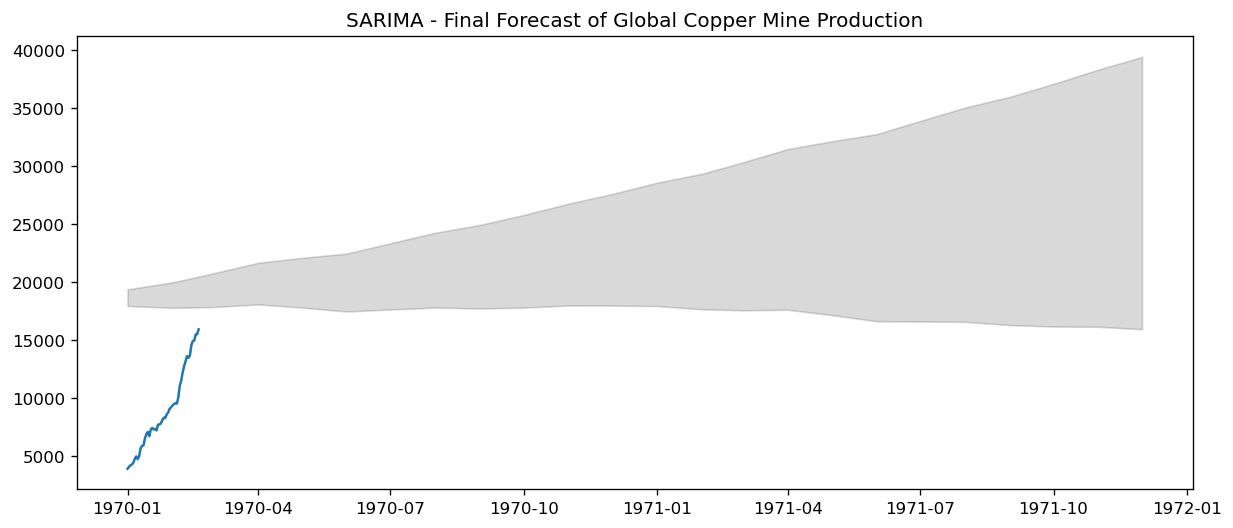

In [307]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train.mine_production)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Global Copper Mine Production")
plt.show()


In [349]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['mine_production'], 
                order = (3, 0, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()




/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09966D+01    |proj g|=  3.04154D+01

At iterate    5    f=  5.68602D+00    |proj g|=  1.23447D-01

At iterate   10    f=  5.65298D+00    |proj g|=  5.05491D-03

At iterate   15    f=  5.65244D+00    |proj g|=  3.67879D-03

At iterate   20    f=  5.65012D+00    |proj g|=  4.01748D-03

At iterate   25    f=  5.64997D+00    |proj g|=  4.35923D-04

At iterate   30    f=  5.64993D+00    |proj g|=  2.00380D-03

At iterate   35    f=  5.64484D+00    |proj g|=  2.96493D-02

At iterate   40    f=  5.63340D+00    |proj g|=  5.08432D-03

At iterate   45    f=  5.63302D+00    |proj g|=  2.77826D-03

At iterate   50    f=  5.63286D+00    |proj g|=  9.94445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    mine_production   No. Observations:                   50
Model:             SARIMAX(3, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -281.643
Date:                            Mon, 19 Sep 2022   AIC                            579.286
Time:                                    15:53:18   BIC                            592.387
Sample:                                         0   HQIC                           583.947
                                             - 50                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4906      1.010      0.486      0.627      -1.489       2.470
ar.L2          0.3648      1.191      0.306      0.759      -1.969       2.699
ar.L3          0.1233      0.280      0.440      0.660      -0.426       0.673
ma.L1          0.5730      0.959      0.598      0.550      -1.306       2.452
ar.S.L12      -0.8688      0.304     -2.861      0.004      -1.464      -0.274
ar.S.L24      -0.6531      0.274     -2.383      0.017      -1.190      -0.116
ma.S.L12       0.4671      0.557      0.839      0.401      -0.624       1.558
sigma2       9.47e+04   5.11e+04      1.852      0.064   -5541.941    1.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.04
Prob(Q):                              0.86   Prob(JB):                         0.13
Heteroskedasticity (H):               1.25   Skew:                            -0.61
Prob(H) (two-sided):                  0.69   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [363]:
validate.tail()

,mine_production,refined_production,refined_usage
year,,,
2010,15987,18981,19130
2011,15960,19601,19704
2012,16687,20194,20468
2013,18185,21058,21401
2014,18422,22490,22908


<AxesSubplot:xlabel='year'>

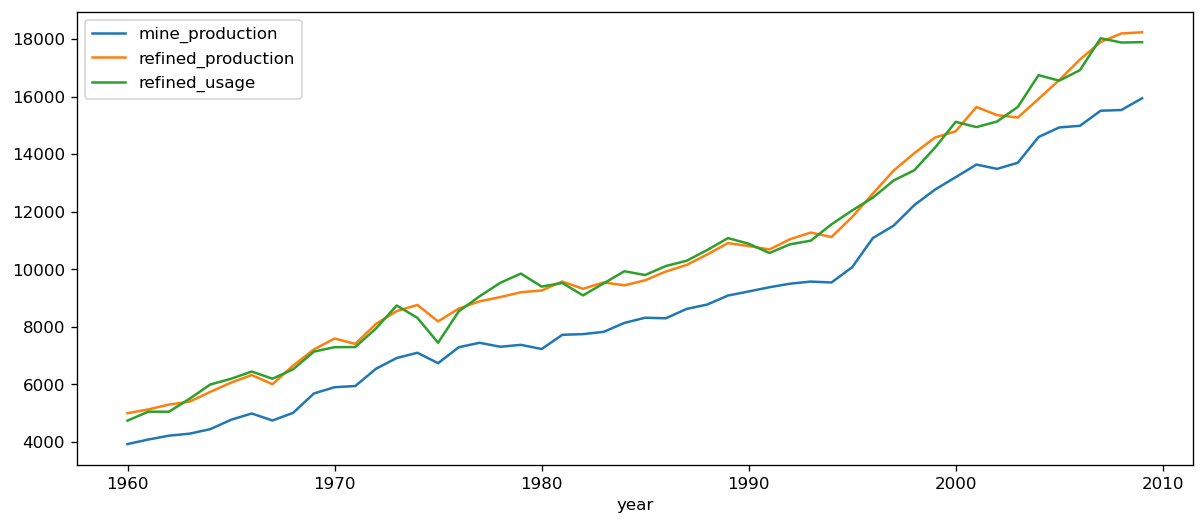

In [356]:
train.plot()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='year'>

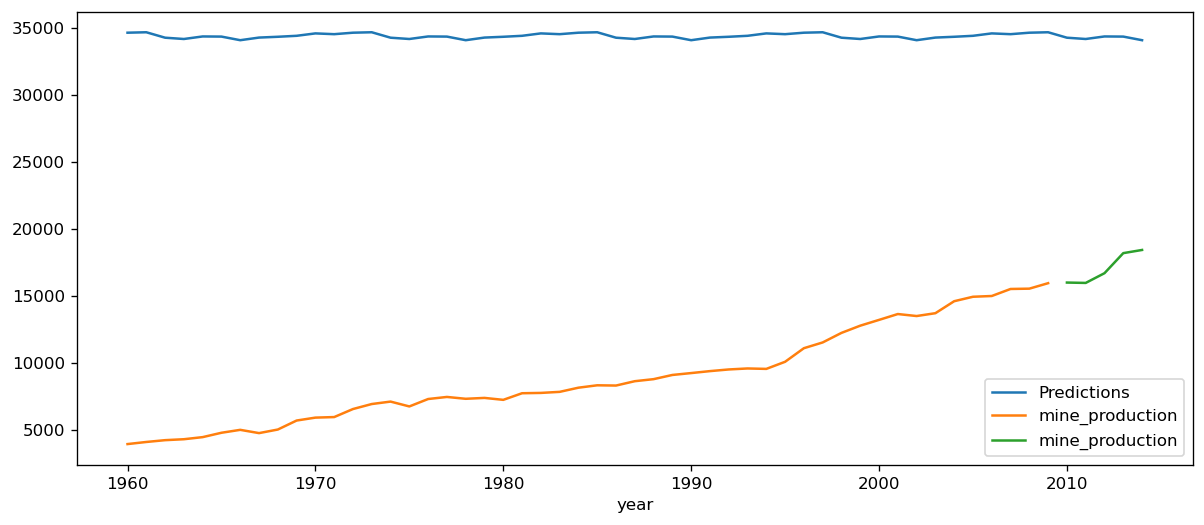

In [364]:
start = 1960
end = 2014
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['mine_production'].plot(legend = True)
validate['mine_production'].plot(legend = True)

In [365]:
predictions

1960    34648.569102
1961    34681.715998
1962    34275.192559
1963    34178.635894
1964    34368.401561
1965    34357.776045
1966    34088.565836
1967    34284.522087
1968    34344.113474
1969    34416.942087
1970    34596.329502
1971    34538.192717
1972    34648.569102
1973    34681.715998
1974    34275.192559
1975    34178.635894
1976    34368.401561
1977    34357.776045
1978    34088.565836
1979    34284.522087
1980    34344.113474
1981    34416.942087
1982    34596.329502
1983    34538.192717
1984    34648.569102
1985    34681.715998
1986    34275.192559
1987    34178.635894
1988    34368.401561
1989    34357.776045
1990    34088.565836
1991    34284.522087
1992    34344.113474
1993    34416.942087
1994    34596.329502
1995    34538.192717
1996    34648.569102
1997    34681.715998
1998    34275.192559
1999    34178.635894
2000    34368.401561
2001    34357.776045
2002    34088.565836
2003    34284.522087
2004    34344.113474
2005    34416.942087
2006    34596.329502
2007    34538

In [358]:
train.head()

,mine_production,refined_production,refined_usage
year,,,
1960,3924,4998,4738
1961,4081,5127,5050
1962,4216,5296,5048
1963,4286,5400,5500
1964,4443,5739,5995


In [360]:
validate = validate.set_index('year')

In [354]:
validate.index

RangeIndex(start=50, stop=55, step=1)

<AxesSubplot:xlabel='year'>

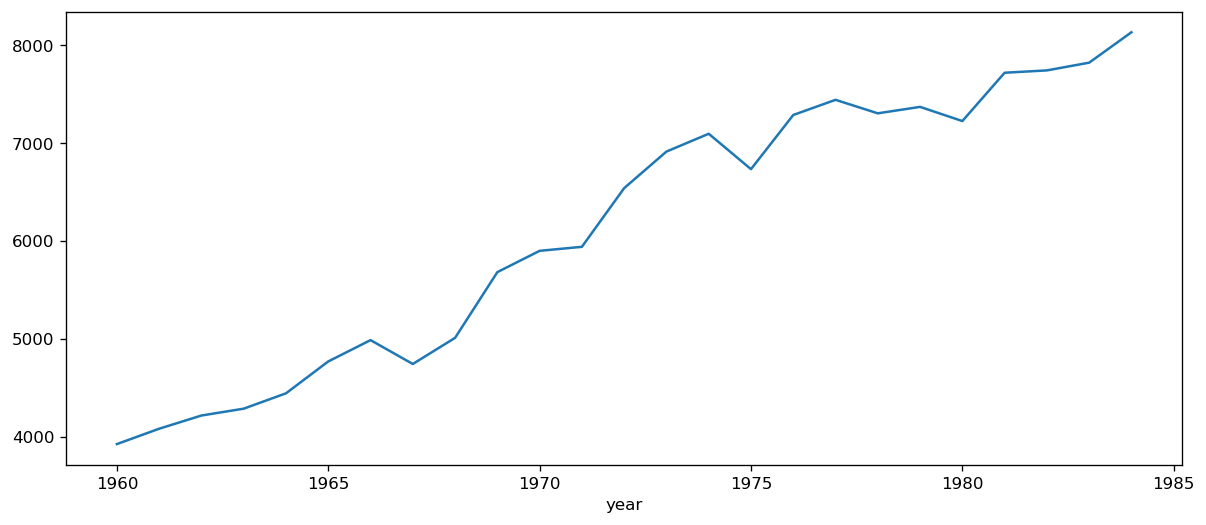

In [341]:
train.mine_production.head(25).plot()

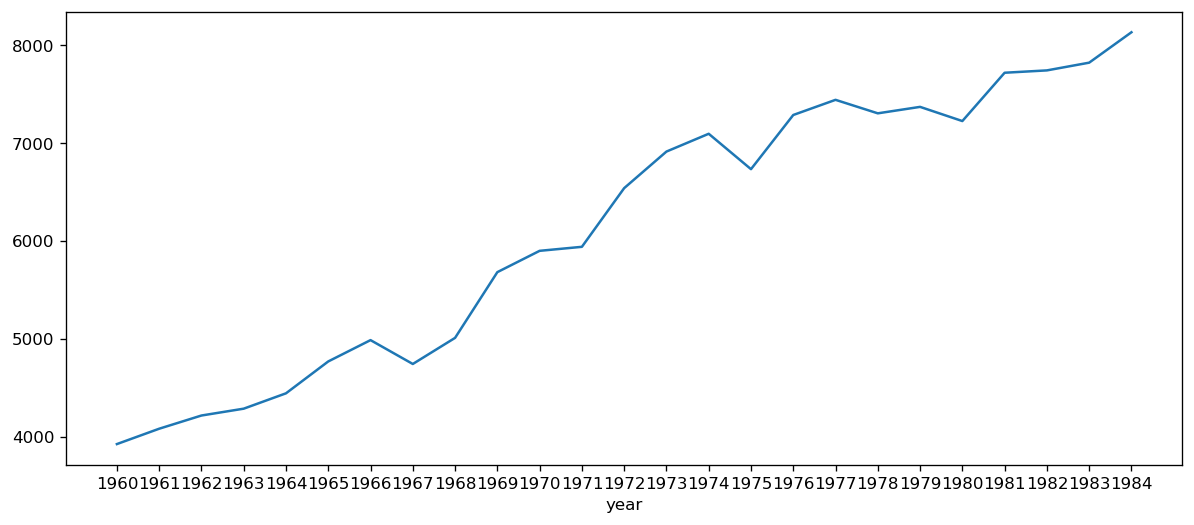

In [343]:
x = range(1960, 1985)
train.mine_production.head(25).plot()
plt.xticks(x)
plt.show()

In [326]:
train = train.set_index('year')

In [329]:
train.head()

,mine_production,refined_production,refined_usage
year,,,
1960,3924,4998,4738
1961,4081,5127,5050
1962,4216,5296,5048
1963,4286,5400,5500
1964,4443,5739,5995


In [344]:
first_diff = train.mine_production.diff()[1:]

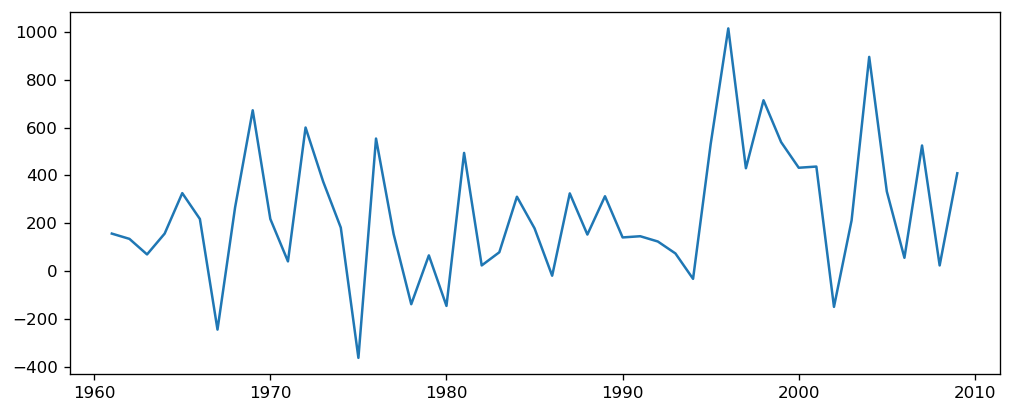

In [345]:
plt.figure(figsize = (10,4))
plt.plot(first_diff)
